<a href="https://colab.research.google.com/github/C-korir/Dta/blob/main/Enrolling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Sample course names
courses = ["Calculus", "Data Science", "IoT", "Networking", "Programming"]

# Sample genders and categories
genders = ["Male", "Female"]
categories = ["Self Sponsored", "Government Sponsored"]

# Generate random enrollment records for 100 fictional students
num_students = 50
enrollment_data = []

for student_id in range(1, num_students + 1):
    # Randomly generate age between 19 to 23
    age = random.randint(19, 23)

    # Random program duration between 2 to 4 years
    program_duration = random.randint(2, 4)
    start_date = datetime(2019, 9, 1)  # Start date for enrollment

    for year in range(program_duration):
        for semester in ["Semester 1", "Semester 2"]:
            # Randomly choose a course for each semester
            course = random.choice(courses)

            # Generate random grade (A, B, C, D, E)
            grade = random.choice(["A", "B", "C", "D", "E"])

            # Generate random credits (typically between 1 to 4)
            credits = random.randint(1, 4)

            # Generate random gender and category
            gender = random.choice(genders)
            category = random.choice(categories)

            # Create enrollment record
            enrollment_data.append({
                "Student_ID": student_id,
                "Course_Name": course,
                "Grade": grade,
                "Credits": credits,
                "Semester": f"{semester} {start_date.year + year}",  # Semester and year
                "Enrollment_Date": start_date.strftime("%Y-%m-%d"),
                "Gender": gender,
                "Category": category,
                "Age": age
            })
            start_date += timedelta(days=90)  # Increment by approximately 3 months for next semester

# Create a DataFrame from the generated data
enrollment_df = pd.DataFrame(enrollment_data)

# Display a sample of the generated enrollment data
print(enrollment_df.head(50))

    Student_ID   Course_Name Grade  Credits         Semester Enrollment_Date  \
0            1           IoT     B        3  Semester 1 2019      2019-09-01   
1            1   Programming     E        2  Semester 2 2019      2019-11-30   
2            1   Programming     A        2  Semester 1 2021      2020-02-28   
3            1    Networking     D        4  Semester 2 2021      2020-05-28   
4            1    Networking     C        2  Semester 1 2022      2020-08-26   
5            1           IoT     A        3  Semester 2 2022      2020-11-24   
6            1           IoT     D        1  Semester 1 2024      2021-02-22   
7            1  Data Science     C        1  Semester 2 2024      2021-05-23   
8            2      Calculus     D        4  Semester 1 2019      2019-09-01   
9            2   Programming     E        3  Semester 2 2019      2019-11-30   
10           2      Calculus     D        1  Semester 1 2021      2020-02-28   
11           2  Data Science     C      

In [7]:
import pandas as pd

# Sample data creation with corrected lengths
data = {
    "Married": ["yes", "yes", "yes", "yes", "No", "yes", "No", "No", "yes", "yes", "No", "No", "No", "yes"],
    "Course": ["Bcom", "Bscit", "Bse", "Bbit", "Bbit", "Bscit", "Bcom", "Bse", "Bscit", "Bscit", "Bse", "Bbit", "Bscit", "Dse"],
    "Full_time/online_student": ["Full time"] * 8 + ["Online"] * 6,
    "Nationality": ["Kenyan"] * 14,
    "Mother's_qualification": ["Graduate", "Graduate", "Non-graduate", "Graduate", "Graduate", "Non-graduate", "Graduate", "Non-graduate", "Non-graduate", "Graduate", "Graduate", "Non-graduate", "Graduate", "Graduate"],
    "Father's_qualification": ["Graduate"] * 7 + ["Non-graduate"] * 7,
    "Displaced": ["No"] * 14,
    "Educational_special_needs": ["No"] * 14,
    "Debtor": ["No"] * 11 + ["Yes"] * 3,
    "Mother's_occupation": ["Doctor", "Accountant", "Business", "Politician", "Nurse", "Farmer", "Teacher", "Business", "Farmer", "Doctor", "Accountant", "Police", "Nurse", "Nurse"],
    "Father's_occupation": ["Banker", "Doctor", "Business", "Doctor", "Accountant", "Teacher", "Banker", "Farmer", "Police", "Politician", "Police", "Business", "Doctor", "Teacher"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female"],
    "Scholarship_holder": ["Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "No"],
    "Tuition_fees_up_to_date": ["Yes"] * 14,
    "Age_at_enrollment": [18, 18, 18, 20, 21, 19, 17, 17, 25, 18, 18, 22, 23, 19]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Clean up column names by replacing spaces and special characters
df.columns = df.columns.str.strip().str.replace("'", "").str.replace(" ", "_")

# Encode categorical variables to integers
# Mapping binary categorical variables
binary_columns = ['Married', 'Displaced', 'Educational_special_needs', 'Debtor', 'Scholarship_holder', 'Tuition_fees_up_to_date']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# Encoding other categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Course', 'Full_time/online_student', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Gender'], drop_first=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)

# Optionally save the cleaned data to a new CSV file
df.to_csv('/content/Graduation_data.csv', index=False)


Original DataFrame:
   Married Course Full_time/online_student Nationality Mother's_qualification  \
0      yes   Bcom                Full time      Kenyan               Graduate   
1      yes  Bscit                Full time      Kenyan               Graduate   
2      yes    Bse                Full time      Kenyan           Non-graduate   
3      yes   Bbit                Full time      Kenyan               Graduate   
4       No   Bbit                Full time      Kenyan               Graduate   
5      yes  Bscit                Full time      Kenyan           Non-graduate   
6       No   Bcom                Full time      Kenyan               Graduate   
7       No    Bse                Full time      Kenyan           Non-graduate   
8      yes  Bscit                   Online      Kenyan           Non-graduate   
9      yes  Bscit                   Online      Kenyan               Graduate   
10      No    Bse                   Online      Kenyan               Graduate   
11      

Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


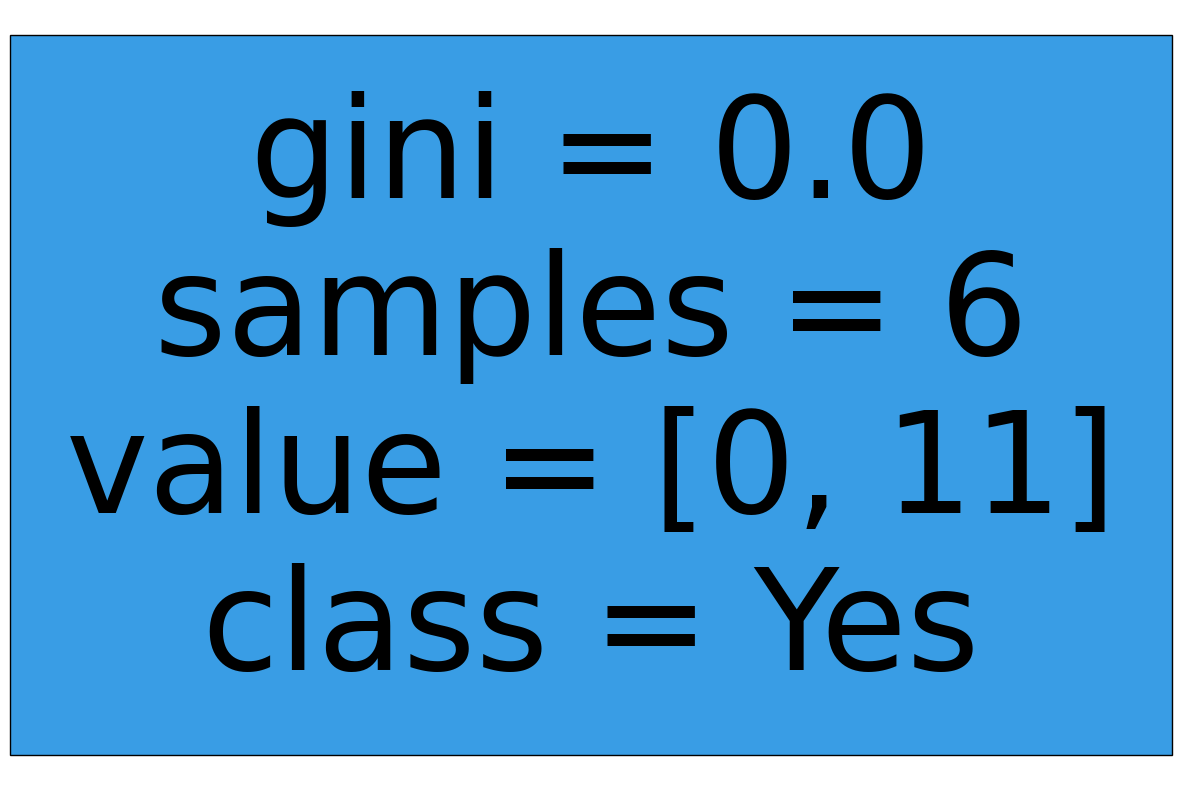

In [13]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/Graduation_data.csv')  # Adjust this path if necessary

# Select features and target variable based on available columns in the cleaned DataFrame
features = data[['Married', 'Course_Bcom', 'Course_Bscit', 'Course_Bse', 'Course_Dse',
                 'Educational_special_needs', 'Gender_Male', 'Tuition_fees_up_to_date']]
target = data['Scholarship_holder']  # Assuming 'Scholarship_holder' is the target variable

# Encode categorical features
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])

# Encode the target variable if it's a string
if target.dtype == 'object':
    le = LabelEncoder()
    target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Visualize the first decision tree in the forest
plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], feature_names=features.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


